In [1]:
import os
from pathlib import Path
import torch
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
BATCH_SIZE = 32
data_dir = Path('../data')

train_data = datasets.FashionMNIST(root=data_dir,
                                   train=True,
                                   download=True,
                                   transform=ToTensor(),
                                   target_transform=None)
test_data = datasets.FashionMNIST(root=data_dir,
                                  train=False,
                                  download=True,
                                  transform=ToTensor())

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

print(f'DataLoader: {train_dataloader, test_dataloader}')
print(f'length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}')
print(f'length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}')

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x0000023A1A9E8050>, <torch.utils.data.dataloader.DataLoader object at 0x0000023A1A989090>)
length of train dataloader: 1875 batches of 32
length of test dataloader: 313 batches of 32


## AutoEncoder V1

In [22]:
%load_ext autoreload
%autoreload 2

import os
import torch
from torch import nn
import utils, engine, autoencoder_model

NUM_EPOCHS = 30
LEARNING_RATE = 0.0001
WEIGHT_DECAY = 0.00001
SEED = 42
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

autoencoder_V_1 = autoencoder_model.AutoEncoder_V_1().to(device)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder_V_1.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

engine.train(model=autoencoder_V_1,
             train_dataloader=train_dataloader,
             test_dataloader=test_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             epochs=NUM_EPOCHS,
             device=device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.2173 | test_loss: 1.3639 | 
Epoch: 2 | train_loss: 1.2742 | test_loss: 1.1857 | 
Epoch: 3 | train_loss: 1.1280 | test_loss: 1.0586 | 
Epoch: 4 | train_loss: 1.0337 | test_loss: 1.0025 | 
Epoch: 5 | train_loss: 0.9908 | test_loss: 0.9683 | 
Epoch: 6 | train_loss: 0.9601 | test_loss: 0.9434 | 
Epoch: 7 | train_loss: 0.9372 | test_loss: 0.9245 | 
Epoch: 8 | train_loss: 0.9215 | test_loss: 0.9113 | 
Epoch: 9 | train_loss: 0.9087 | test_loss: 0.8997 | 
Epoch: 10 | train_loss: 0.8963 | test_loss: 0.8859 | 
Epoch: 11 | train_loss: 0.8849 | test_loss: 0.8791 | 
Epoch: 12 | train_loss: 0.8739 | test_loss: 0.8670 | 
Epoch: 13 | train_loss: 0.8642 | test_loss: 0.8569 | 
Epoch: 14 | train_loss: 0.8557 | test_loss: 0.8495 | 
Epoch: 15 | train_loss: 0.8488 | test_loss: 0.8444 | 
Epoch: 16 | train_loss: 0.8426 | test_loss: 0.8403 | 
Epoch: 17 | train_loss: 0.8375 | test_loss: 0.8333 | 
Epoch: 18 | train_loss: 0.8327 | test_loss: 0.8314 | 
Epoch: 19 | train_loss: 0.8286 | test

{'train_loss': [2.2172782150268553,
  1.2742387722333273,
  1.1280330976168316,
  1.033730085436503,
  0.9907998758951823,
  0.9600706835110983,
  0.9372216596921285,
  0.9215122676849365,
  0.9086943726539611,
  0.8962883344332377,
  0.8849230737686157,
  0.8738759881655375,
  0.8642463980038961,
  0.8557494569460551,
  0.8487641870816549,
  0.8425574098904928,
  0.8374630622545878,
  0.8327186793327331,
  0.8286476243019104,
  0.8244782183965047,
  0.8211669178326925,
  0.8175583366394042,
  0.8138170206069947,
  0.8102658445676167,
  0.8067108604749044,
  0.8031616746584574,
  0.7997378698031108,
  0.7967594600359599,
  0.7936869451204935,
  0.7906547963460286],
 'test_loss': [1.3638862752305052,
  1.185706163938053,
  1.0586473688530846,
  1.0025313555623014,
  0.9683371121510149,
  0.9433800119180649,
  0.9244976974904727,
  0.9113136044325539,
  0.8997260255935474,
  0.8858826487970809,
  0.879074570469963,
  0.8670363900379632,
  0.856943148964891,
  0.849541406090648,
  0.84439

In [23]:
import utils
utils.save_model(model=autoencoder_V_1,
                 target_dir='trained_models',
                 model_name='autoencoder_V_1.pth')

[INFO] Saving model to: trained_models\autoencoder_V_1.pth


### V1 Results

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


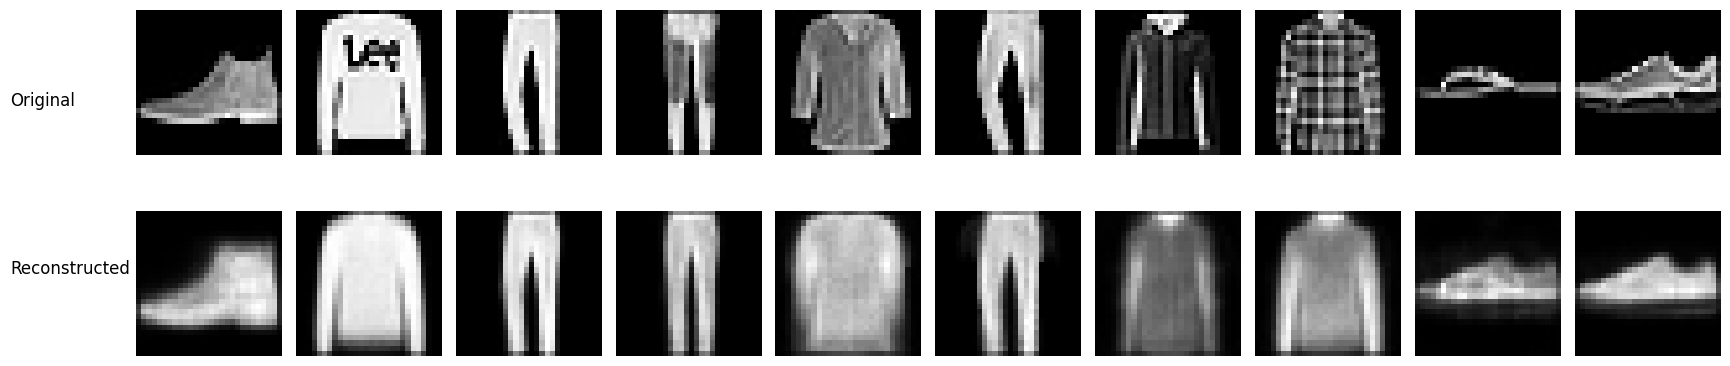

In [24]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

from plot_image import plot_reconstructed_images
plot_reconstructed_images(model=autoencoder_V_1, dataloader=test_dataloader, device=device, num_images_to_plot=10)